In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import sklearn as sk
from sklearn import datasets, linear_model

A3 #5

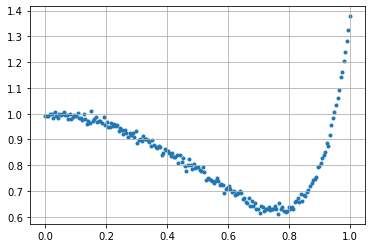

In [ ]:
size = 200
x = np.linspace(0,1,size)
y = np.exp(-x**2)+x**10+np.random.normal(0, 0.01, x.shape)
fig, ax = plt.subplots()
ax.scatter(x,y, marker = '.')
ax.grid()
plt.show()

score = 0.20561805806919964


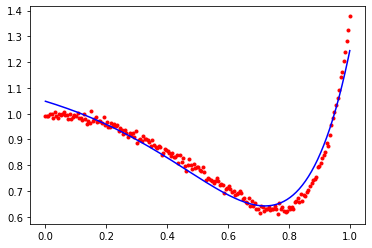

In [ ]:
MAX_ORDER = 7
polynomial_features = PolynomialFeatures(MAX_ORDER, include_bias=False)
X = polynomial_features.fit_transform(x.reshape(-1,1))
#отнормируем столбцы матрицы X
Xn = (X-np.mean(X,axis=0))/(np.std(X,axis=0)+0.1)
Xn = np.hstack((np.ones((Xn.shape[0],1)),Xn))
#Возьмём функцию градиентного спуска из семинара A3
def make_L1_regression_grad_descent_iteration(X, y, w, mu, alpha):
    grad = 2 * (X @ w - y) @ X + 2 * mu * np.sign(w)
    w -= alpha * grad
    return w
#Обучение без кросс-валидации
w0 = np.random.normal(0, 0.01, Xn.shape[1])
w = make_L1_regression_grad_descent_iteration(Xn, y, w0, 0.01, 0.00001)
for i in range (10000):
      make_L1_regression_grad_descent_iteration(Xn, y, w, 0.01, 0.00001)
plt.scatter(x, y, color="r", marker = '.')
plt.plot(x, Xn @ w, color="b")
print("score =", np.sum((Xn @ w - y)**2))
plt.show()

score = 0.04671393813307356


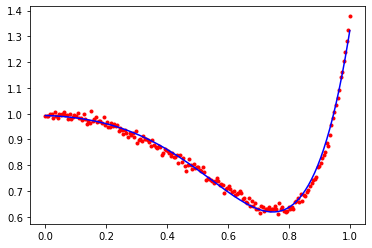

In [ ]:
K = 3 
s = 0
p = []
for mu in [1e-4, 5, 8]:
    for alpha in [1e-4, 1e-5, 5e-4]:
        for train, test in KFold(K, shuffle=True).split(Xn):
            w = make_L1_regression_grad_descent_iteration(Xn, y, w0, mu, alpha)
            for i in range (10000):
              make_L1_regression_grad_descent_iteration(Xn, y, w, mu, alpha)
            s+=np.sum((Xn[test] @ w - y[test])**2)
        p.append([s/9, mu, alpha])
p = np.array(p)
mu, alpha = (p[np.argsort(p[:, 0])])[0][1:]
w = make_L1_regression_grad_descent_iteration(Xn, y, w0, mu, alpha)
for i in range (10000):
      make_L1_regression_grad_descent_iteration(Xn, y, w, mu, alpha)
plt.scatter(x, y, color="r", marker = '.')
plt.plot(x, Xn @ w, color="b")
print("score =", np.sum((Xn @ w - y)**2))
plt.show()

A3 #6

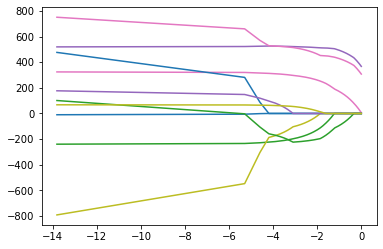

In [ ]:
data, target = sk.datasets.load_diabetes(return_X_y=True)
a = 1e-6
alpha_linspace = np.linspace(a, 1, 200)
lm = linear_model.Lasso(a)
lm.fit(data, target)
values = lm.coef_
for alpha in alpha_linspace:
    lm = linear_model.Lasso(alpha)
    lm.fit(data, target)
    values = np.vstack([values, lm.coef_])
alpha_linspace = np.hstack([[a], alpha_linspace])
for i in range(values.shape[1]):
    plt.plot(np.log(alpha_linspace), values[:, i], 0.9)
plt.show()